# 09. PyTorch Model Deployment

Lets bring FoodVision to life and make it publicly accessible.

**We are going to deploy our FoodVision model to the internet as a usable app!**


## What is machine learning model deployment?

***Machine learning model deployment** is the process of making your machine learning model accessible for others.*

For example, someone taking a photo on their smartphone of food and then having our FoodVision model classify it into pizza, steak, or sushi.

Some other examples can be, *an operating system may lower its resource consumption based on a machine learning model making predictions on how much power someone generally uses at specific times of day.*

Also these models can learn from each other as well. For example, a Tesla car's computer vision system will interact with the car's route planning program and then the route planning program will get inputs and feedback from the driver.


## Why deploy a machine learning model?

One of the most important philosophical question in machine learning is:
***if a machine learning model never leaves a notebook, does it exist?***

---
Deploying a model is as important as training one.

Because although you can get a pretty good idea of how your model is going to function by evaluating it on a well crafted test set or visualizing its results, you never really know how it will perform ultil you release it to the wild.

***Having people who've never used your model interact with it will often reveal edge cases you never thought of during training.***

For example, what happens if someone was to upload a photo that wasn't of food to our FoodVision model?

One solution would be to create another model that firstclassifies images as "food" or "not food" and passing the target image through that model first.

THen if the images is of "food" it goes to our FoodVision model and gets classifies into pizza, steak, or sushi.

And if it's "not food", a message is displayed.

But what is these predictions were wrong?

What happens then?

You can see how these questions could keep going.

Thus this highlights the importance of model deployment: it helps you figure our errors in your model that aren't obvious during training/testing.

---

***But once you've got a good model, deployment is a good next step. Monitoring involves seeing how your model goes on the most important data split: data from the real world.***

## Different types of machine learning model deployment

Whole books could be written on the different types of machine learning model deployment(and many good one are listed [PyTorch Extra Resources](https://www.learnpytorch.io/pytorch_extra_resources/#resources-for-machine-learning-and-deep-learning-engineering))

---
Let's start with a simple question:
> What is the most ideal scenario for our machine leanring model to be used?

ANd then work backward from there.

In case of FoodVision, our ideal scenerio might be:
- someone taking a photo on a mobile device(through an app or web browser)
- The prediction comes back fast.

Easy.

So we have two main criteria:
1. The model should work on a mobile device
2. THe model should make predictions *fast*(because a slow app is a boring app).

And of course, depending on our use case, our requirements may vary.

We may notive the above two points break down into another two questions:
1. **Where's it going to go?** - As in, where is it going to be stored?
2. **How's it going to function?** - As in, does it return predictions immediatedly? or do they come later?

![](09-deployment-questions-to-ask.png)

*When starting to deploy machine learning models, it's helpful to start by asking what's the most ideal use case and then work backwards from there, asking where the model is going to go and then how it's going to function.*

## Where's it going to go?

When you deploy your machine learning model, where does it live?

THe main debate here is usually on-device (also called edge/in the browser) or on the cloud (a computer/server that isn't the actual device someone/something calls the model from).

Both have their pros and cons.

| Deployment location| Pros| Cons|
|:--|:--|:--|
| **On-device(edge/in the browser** | Can be very fast (since no data leaves the device)|Limited compute power (larger models take longer to run)|
| - | Privacy preserving (again no data has to leave the device)| Limited storage space (smaller model size required)|
|-|No internet connection required (sometimes)|Device-specific skills often required|
| **On cloud** | Near unlimited compute power (can scale up when needed)|Costs can get out of hand (if proper scaling limits aren't enforced)|
|-|Can deploy one model and use everywhere (via API)|Predictions can be slower due to data having to leave device and predictions having to come back (network latency)|
|-|Links into existing cloud ecosystem|Data has to leave device (this may cause privacy concerns)|

There are more details to these but I've left resources in the extra-curriculum to learn more.

Let's give an example.

If we're deploying FoodVision as an app, we want it to perform well and fast.

<div class='alert alert-success'>

So which model would we prefer?
1. A model on-device that performs at 95% accuracy with an inference time (latency) of one second per prediction.
2. A model on the cloud that performs at 98% accuracy with an inference time of 10 seconds per prediction (bigger, better model but takes longer to compute).

</div>

We've made these numbers up but they showcase a potential difference between on-device and on the cloud.

***Option 1** could potentially be a smaller less performant model that runs fast because its able to fit on a mobile device.*

***Option 2** could potentially a larger more performant model that requires more compute and storage but it takes a bit longer to run because we have to send data off the device and get it back (so even though the actual predictoin might be fast, the network time and data transfer has to be factored in)

**For FoodVision, we'd likely prefer 1, because the small hit in performance is outweighted by the faster inference speed.
![](09-model-deployment-on-device-vs-cloud.png)

*In the case of a Tesla car's computer vision system, which would be better? A smaller model that performs well on device (model is on the car) or a larger model that performs better that's on the cloud? In this case, you'd much prefer the model being on the car. The extra network time it would take for data to go from the car to the cloud and then back to the car just wouldn't be worth it (or potentially even impossible with poor signal areas).*

***Note**: For a full example of seeing what it's like to deploy a PyTorch model to an edge device, see the PyTorch tutorial on achieving real-time inference (30fps+) with a computer vision model on a Raspberry Pi.*

## How's it going to function?

Back to the ideal use case, when you deploy your machine learning, **How should it work?**

1. *As in, would you like predictions returned immediately??*

2. *or is it okay for them to happen later?*

These two scenarios are generally referred to as:
- Online (real-time) - *Predictions/inference happen **immediately***. For eample, someone uploads an image, the image gets transformed and predictions are returned or someone makes a purchase and the transaction is verified to be non-fraudulent by a model so the purchase can go through.
- Offline (batch) - *Predictions/inference happen **periodically***. For example, a photos application sorts your images into different categories (such as beach, mealtime, family, friends) whilst your mobile device is plugged into charge.

***Note:** `Batch` refers to inference being performed on multiple samples at a time. However, to add a little confusion, batch processing can happen immediately/online (multiple images being classified at once) and/or offline (multiple images being predicted/trained on at once).*

The main difference between each being: prediction being made immediately or periodically.

Periodically can have a varying timescale too, from every few seconds to every few hours or days.

And you can mix and match the two.

In the case of FoodVision, we'd want our inference pipeline to happen online (real-time), so when someone uploads an image of pizza, steak, or sushi, the prediction results are returned immediately (any slower than real-time would make a boring experience).

But for our training pipeline, it's okay for it to happen in a batch (offline) fashion, which is what we've beein doing throughout the previous chapters.

## Ways to deploy a machine learning model

We've discussed a couple of options for deploying machine learning models (on-device and cloud)

And each of these will have their specific requirements.

| Tool/Resource | Deployment Type|
|:-|:-|
| [Google's ML Kit](https://developers.google.com/ml-kit)| On-device (Android and iOS)|
| [Apple's Core ML](https://developer.apple.com/documentation/coreml) and [`coremltools` Python package](https://apple.github.io/coremltools/docs-guides/) | On-device (all Apple devices)|
| [Amazon Web Service's (AWS) Sagemaker](https://aws.amazon.com/sagemaker/)| Cloud|
| [Google Cloud's Vertex AI](https://cloud.google.com/vertex-ai) | Cloud |
| [Microsoft's Azure Machine Learning](https://azure.microsoft.com/en-au/services/machine-learning/) | Cloud|
| [HuggingFace Spaces](https://huggingface.co/spaces) | Cloud |
| API with [FastAPI](https://fastapi.tiangolo.com/) | Cloud/self-hosted server |
|API with [TorchServe](https://pytorch.org/serve/) | Cloud/self-hosted server |
| [ONNX (open Neural Network Exchange)](https://pytorch.org/serve/) | Many/general|
| Many more..|-|

***Note**: An application programming interface (API) is a way for two (or more) computer programs to interact with each other. For example, if your model was deployed as API, you would be able to write a program that could send data to it and then receive predictions back.*

Which option you choose will be highly dependent on what you're building/who you're working with.

But with so many options, it can be very intimidating.

So best to start small and keep it simple.

And one of the best ways to do so is by turning your machine learning model into a demp app with [***Gradio***](https://gradio.app/) and then deploying it on Hugging Face spaces.

We'll be doing just that with FoodVision later on.
![](09-tools-and-places-to-deploy-ml-models.png)

*A handful of places and tools to host and deploy machine learning models. There are plenty we've missed, feel free to find them later.*

## What we're going to cover

Let's become a machine learning engineer and actually deploy a machine learning model.

Our goal is to deploy our FoodVision Model via a demo Gradio app with the following metrics:
1. **Performance**: 95% accuracy.
2. **Speed**: real-time inference of 30FPS+(each prediction has a latency of lower than ~0.03s)

We'll start by running an experiment to compare our best two models so far: EffNetB2 and ViT feature extractors.

Then we'll deploy the one which performs closest to our goal metrics.

***Finally, we'll finish with a (BIG) surprise bonus.***

| Topic |
|:-|
|**0. Setting up** |
|**1. Get data** |
|**2. FoodVision Mini model deployment experiment outline**|
|**3. Creating an EffNetB2 feature extractor**|
|**4. Creating a ViT feature Extractor**|
|**5. Making predictions with our trained models and timing them**|
|**6. Comparing model results, prediction times and size**|
|**7. Bringing FoodVision to life by creating a Gradio demo**|
|**8. Turning our FoodVision Gradio demo into a deployable app**|
|**9. Deploying our gradio demo to HuggingFace Spaces**|
|**10. Creating a BiG surprise**|
|**11. Deploying our BiG suprise****|

## 0. Setting up

As we've dome previously, let's make sure we've got all of the modules we'll need for this section.

We'll import the Python scripts (such as `data_setup.py` and `engine.py`) we created in 05. PyTorch Going Modular.

To do so, we'll download `going_modular` directory from the `pytorch-deep-learning` repository (if we dont already have it).

We'll also get the `torchinfo` package if it's not available.

`torchinfo` will help later on to give us visual representation of our model.

ANd since later on we'll be using `torchvision`, we'll make sure we've got the latest versions.

In [1]:
import torch
import torchvision

print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

torch version: 2.2.2
torchvision version: 0.17.2


Now we'll continue with the regular imports, setting up device agnostic code, and this time we'll also get the `helper_functions.py` script from GitHub.

The `helper_functions.py` scrip contains several functions we created in previous sections:
- `set_seeds()` - sets the random seeds
- `download_data()` - to download a data source given a link
- `plot_loss_curves()` - to inspect our model's training results.

In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms
from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4356, done.
remote: Counting objects: 100% (321/321), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 4356 (delta 213), reused 255 (delta 177), pack-reused 4035 (from 1)
Receiving objects: 100% (4356/4356), 654.51 MiB | 22.92 MiB/s, done.
Resolving deltas: 100% (2584/2584), done.
Updating files: 100% (248/248), done.


In [4]:
# device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Getting data

We left off in `08. PyTorch Paper Replicating` comparing our own `Vision Transformer (ViT)` feature extractor model to the `EfficientNetB2 (EffNetB2)` feature extractor model we created in `07. PyTorch Experiment Tracking.`

And we found that there was a slight difference in the comparison.

The EffNetB2 model was trained on 20% of the pizza, steak, and sushi data from Food101 where as the ViT model was trained on 10%.

Since our goal is to deploy the best model for our FoodVision problem, let's  start by downloading the [20% pizza, steak, and sushi dataset](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip) and train an EffNetB2 feature extractor and ViT feature extractor on it and then compare the two models.

This way we'll be comparing apples to apples (one model trained on a dataset to another model tarined on the same dataset).

***Note:** The dataset we're downloading is a sample of the entire [`Food101 dataset`](https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html#food101) (101 food classes with 1,000 images each). More specifically, 20% refers to 20% of images from the pizza, steak and sushi classes selected at random. You can see how this dataset was created in `extras/04_custom_data_creation.ipynb` and more details in `04. PyTorch Custom Datasets section 1`.*

We can download the data using the `download_data()` function we created in `07. PyTorch Experiment Tracking section 1` from `helper_functions.py`.

In [5]:
# Download pizza, steak, sushi images from GitHub
data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                                     destination="pizza_steak_sushi_20_percent")

data_20_percent_path

[INFO] Did not find data/pizza_steak_sushi_20_percent directory, creating one...
[INFO] Downloading pizza_steak_sushi_20_percent.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip...
[INFO] Unzipping pizza_steak_sushi_20_percent.zip data...


PosixPath('data/pizza_steak_sushi_20_percent')

Now,

Let's create training and test paths.

In [6]:
# Setup directory paths to train and test images
train_dir = data_20_percent_path / "train"
test_dir = data_20_percent_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

## 2. FoodVision model deployment experiment outline

The ideal deployed model FoodVision performs well and fast.

We'd like our model to perform as close to real-time as possible.

Real-time in this case being ~30FPS (frames per second) because that's [about how fast the human eye can see ](https://www.healthline.com/health/human-eye-fps) (there is debate on this but let's just use ~30FPS as our benchmark).

And for classifying three different classes (pizza, steak, and sushi), we'd like a model that performns at 95%+ accuracy.

Of course, higher accuracy would be nice but this might sacrifice speed.

So our goals are:
1. **Performance** - A model that performs at 95%+ accuracy.
2. **Speed** - A model that can classify an image at ~30FPS(0.03 seconds inference time per image, also known as *latency*)

![](09-model-deployments-speed-vs-inference.png)

*FoodVIsion deployment goals. We'd like a fast predicting well-performing model (because a slow app is boring).

We'll put an emphasis on speed, meaning, we'd prefer a model performing at 90%+ accuracy at ~30FPS than a model performing 95% accuracy at 10FPS.

To try and achieve these results, let's bring in our best performing models from the previous sections:
1. **EffNetB2 feature extractor**(EffNetB2 for short) - originally created in `07. PyTorch Experiment Tracking section 7.5` using `torchvision.models.efficientnet_b2()` with adjusted classifier layers.
2. **ViT-B/16 feature extractor**(ViT for short) - originally created in `08. PyTorch Paper Replicating section 10` using `torchvision.models.vit_b_16()` with adjusted head layers.
    - **Note**: ViT-B/16 stands for <- Vision Transformer Base, path size 16.
  
![](09-model-deployment-two-experiments.png)

***Note:** a `feature extractor model` often starts with a model that has been pretrained on a dataset similar to your own problem. The pretrained model's base layers are often left frozen (the pretrianed pattherns/weights stay the same) whilst some of the top (or classifier/classification head) layers get customized to your own problem by training on your own data. We covered the concept of a feature extractor model in `06. PyTorch Transfer Learning section 3.4.`*

## 3. Creating an EffNetB2 feature extractor

We first created an EffNetB2 feature extractor model in ` 07. PyTorch Experiment Tracking section 7.5.`

And by the end of that section we saw it performed very well.

So let's now recreate it here so we can compare its results to a ViT feature extractor trained on the same data.

To do so we can:
1. Setup the pretrained weights as `weights=torchvision.models.EfficientNet_B2_Weights.DEFAULT` where `DEFAULT` means `best currently available` (or could use weights=`DEFAULT`)
2. Get the pretrained model image transformed from the weights with the `transforms()` method (we need these so we can convert our images into the same format as the pretrained EffNetB2 was trained on).
3. Create a pretrained model instance by passing the weights to an instance of `torchvision.models.efficientnet_b2`
4. Freeze the base layers in the model.
5. Update the classifier head to suit our own data.

In [8]:
# 1. Setup pretrained weights
effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT

# 2. Get EffNetB2 transforms
effnetb2_transforms = effnetb2_weights.transforms()

# 3. Setup pretrained model
effnetb2 = torchvision.models.efficientnet_b2(weights=effnetb2_weights)

# 4. Freeze the base layers in the model
for param in effnetb2.features.parameters():
    param.requires_grad = False

# 5. Update the classifer head to suit our own data
print(f'Classifier head before: {effnetb2.classifier}') 

# changing the out_features = 3 (pizza, steak, and sushi)
effnetb2.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.3, inplace=True),
    torch.nn.Linear(in_features=1408, out_features=3, bias=True)
)

print(f'Classifier head after: {effnetb2.classifier}') 

Classifier head before: Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=1408, out_features=1000, bias=True)
)
Classifier head after: Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=1408, out_features=3, bias=True)
)


Great!!

***Note**: This process of changing the output layers/classifier head will be dependent on the problem you're working on. For example, if you wanted a different number of outputs or a different kind of output, you would have to change the output layers accordingly.*


### 3.1 Creating a function to make an EffNetB2 feature extractor

Looks like our EffNetB2 feature extractor is ready to go, however, since there's quite a few steps involved here, how about we turn the code about into a function we can re-use later?

we'll call it `create_effnetb2_model()` and it'll take a customizable number of classes and a random seed parameter for reproducibility.

Ideally, it will return EffNetB2 feature extractor along with its associated transforms.

In [9]:
def create_effnetb2_model(num_classes:int=3, 
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # 1, 2, 3. Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # 4. Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # 5. Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )
    
    return model, transforms

Let's test it out.

In [10]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=3,
                                                      seed=42)

No errors, nice, now to really try it out, let's get a summary with torchinfo.summary().

In [13]:
from torchinfo import summary

summary(model=effnetb2,
        input_size=(1,3,224,224),
        col_names=['input_size','output_size','num_params','trainable'],
        col_width=20,
        row_settings=['var_names']
       )

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 3]               --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1408, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

### 3.2 Creating DataLoaders for EffNetB2

Our EffNetB2 feature extractor is ready, time to create some `Dataloader`s

We can do this by using the `data_setup.create_dataloaders()` function we created in `05. PyTorch Going Modular section 2`

We'll use a `batch_size` of 32 and transform our images using `effnetb2_transforms` so they're in the same format that our effnetb2 model was trained on.

In [15]:
# Setup DataLoaders
from going_modular.going_modular import data_setup
train_dataloader_effnetb2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                 test_dir=test_dir,
                                                                                                 transform=effnetb2_transforms,
                                                                                                 batch_size=32)

### 3.3 Training EffNetB2 feature extractor

Model ready, `DataLoader`s ready, let's train!

Just like in `07 PyTorch Experiment Tracking section 7.6`, ten epochs should be enough to get good results.

We can do so by creating:
1. an optimizer (we'll use `torch.optim.Adam()` with a learning rate of `1e-3`)
2. a loss function (we'll use `torch.nn.CrossEntropyLoss()` for multi-class classification)

and passing these as well as our `DataLoader`'s to the `engine.train()` function we created in 05. `PyTorch Going Modular section section 4`

In [19]:
from going_modular.going_modular import engine

# setup optimizer
optimizer = torch.optim.Adam(params=effnetb2.parameters(),
                             lr=0.001)

# setup loss function
loss_fn = torch.nn.CrossEntropyLoss()

# set seends for reproducibility and train the model
set_seeds()
effnetb2net_results = engine.train(model=effnetb2,
                                   train_dataloader=train_dataloader_effnetb2,
                                   test_dataloader=test_dataloader_effnetb2,
                                   optimizer=optimizer,
                                   loss_fn=loss_fn,
                                   epochs=10,
                                   device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9804 | train_acc: 0.5646 | test_loss: 0.7385 | test_acc: 0.9284
Epoch: 2 | train_loss: 0.6843 | train_acc: 0.8729 | test_loss: 0.5931 | test_acc: 0.9347
Epoch: 3 | train_loss: 0.5644 | train_acc: 0.8979 | test_loss: 0.4820 | test_acc: 0.9347
Epoch: 4 | train_loss: 0.4720 | train_acc: 0.8667 | test_loss: 0.4185 | test_acc: 0.9443
Epoch: 5 | train_loss: 0.4309 | train_acc: 0.8729 | test_loss: 0.3725 | test_acc: 0.9568
Epoch: 6 | train_loss: 0.3748 | train_acc: 0.8938 | test_loss: 0.3456 | test_acc: 0.9443
Epoch: 7 | train_loss: 0.3367 | train_acc: 0.9083 | test_loss: 0.3123 | test_acc: 0.9506
Epoch: 8 | train_loss: 0.3237 | train_acc: 0.9250 | test_loss: 0.3014 | test_acc: 0.9688
Epoch: 9 | train_loss: 0.3657 | train_acc: 0.8625 | test_loss: 0.2753 | test_acc: 0.9381
Epoch: 10 | train_loss: 0.2551 | train_acc: 0.9437 | test_loss: 0.2639 | test_acc: 0.9597


### 3.4 Inspecting EffNetB2 loss curves

As we saw in 07. PyTorch Experiment Tracking, the EffNetB2 feature extractor model works quite well on our data.

Let's turn its results into loss curves to inspect them further.

***Note**: Loss curves are one of the best ways to visualize how your model's performing. For more on loss curves, check out `04. PyTorch Custom Datasets section 8: What should an ideal loss curve look like`?*

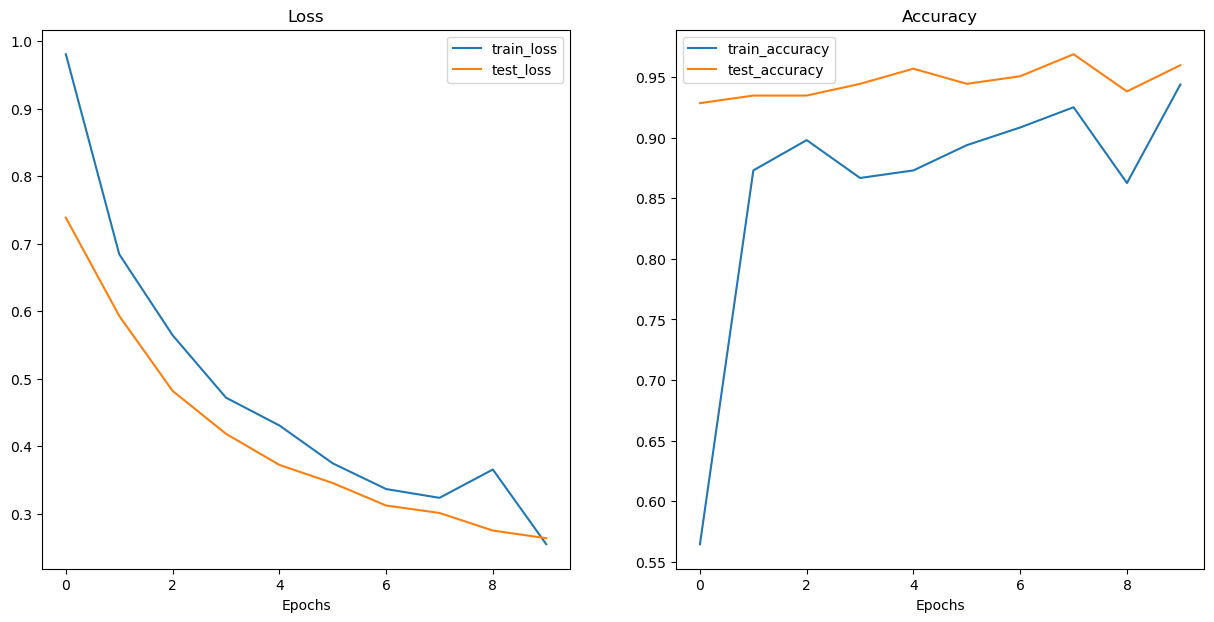

In [21]:
from helper_functions import plot_loss_curves

plot_loss_curves(effnetb2net_results)

Those are some nice looking loss curves.

<div class='alert alert-success'>
    
It looks like our model is `performing quite well` and perhaps would `benefit from a little longer training and potentially some data augmentation` (to help prevent potential overfitting occurring from longer training).

</div>

### 3.5 Saving EffNetB2 feature extractor

Now we've got a well-performing trained model, let's save it to file so we can import and use it later.

TO save our model we can use the `utils.save_model()` function created in `05. PyTorch Going Modular section 5`

We'll set the `target_dir` to `"models"` and the `model_name` to `"09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth"` (a little comprehensive but at least we know what's going on).

In [22]:
from going_modular.going_modular import utils

# Save the model
utils.save_model(model=effnetb2,
                 target_dir="models",
                 model_name="09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth")

[INFO] Saving model to: models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth


### 3.6 Checking the size of EffNetB2 feature extractor

Since one of our criteria for deploying a model to power FoodVision is **speed**(~30FPS or better), let's check the size of our model.

***Why check the size?***

Well, while not always the case, the size of a model can influence its inference speed.

As in, if a model has more parameters, it generally performs more operations and each one of these operations requires some computing power.

And because we'd like our model to work on devices with limited computing power(eg. on a mobile device or in a web browser), generally, ***the smaller the size the better*** ( as long as it sill performs well in terms of accuracy)

To check our model's size in bytes, we can use Python's `pathlib.Path.stat('path_to_model').st_size` and then we can convert it (roughly) to megabytes by dividing it by (`1024x1024`)

In [23]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_effnetb2_model_size = Path('models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth').stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 

print(f"Pretrained EffNetB2 feature extractor model size: {pretrained_effnetb2_model_size} MB")

Pretrained EffNetB2 feature extractor model size: 29 MB


In [25]:
!du -h  models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth

 30M	models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth


python3.10(20784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


### 3.7 Collecting EffNetB2 feature extractor stats

We've got a few statistics about our EffNetB2 feature extractor model such as test loss, test accuracy and model size, how about we collect them all in a dictionary so we can compare them to upcoming ViT feature extractor.

And we'll calculate an extra one for fun, total number of parameters.

We can do so by counting the number of elements(or patterns/weights) in `effnetb2.parameters()`. We'll access the number of elements in each parameter using the `torch.numel()` (short for `number of elements`) method.

In [26]:
# Count the number of parameters in EffNetB2
effnetb2_total_params = sum(torch.numel(param) for param in effnetb2.parameters())
effnetb2_total_params

7705221

Now, let's everything together in a dictionary, so that we can do comparisons later on.

In [28]:
# Create a dictionary with EffNetB2 statistics
effnetb2_stats = {"test_loss": effnetb2net_results["test_loss"][-1],
                  "test_acc": effnetb2net_results["test_acc"][-1],
                  "number_of_parameters": effnetb2_total_params,
                  "model_size (MB)": pretrained_effnetb2_model_size}
effnetb2_stats

{'test_loss': 0.26394857168197633,
 'test_acc': 0.959659090909091,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29}

Looks like our EffNetB2 model is performing at over 95% accuracy!

- [X] `Criteria number 1`: perform at 95%+ accuracy, **tick!**

## 4. Creating a ViT feature extractor

Time to continue with our FoodVision Mini modelling experiments.

This time we're going to create a ViT feature extractor.

And we'll do it much the same way as the EffNetB2 feature extractor except this time with `torchvision.models.vit_b_16` instead of `torchvision.models.efficientnet_b2()`

We'll start by creating a function called `create_vit_model()` which will be vary similar to `create_effnetb2_model()` except of course returning a ViT extractor model and transforms rather than EffNetB2.

Another slight difference is that `torchvision.models.vit_b_16()`'s output layer is called `heads` rather than `classifier`

In [29]:
# Check out ViT heads layer
vit = torchvision.models.vit_b_16()
vit.heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

Knowing this, we've got all the pieces of the puzzle we need.

In [30]:
def create_vit_model(num_classes:int=3, 
                     seed:int=42):
    """Creates a ViT-B/16 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of target classes. Defaults to 3.
        seed (int, optional): random seed value for output layer. Defaults to 42.

    Returns:
        model (torch.nn.Module): ViT-B/16 feature extractor model. 
        transforms (torchvision.transforms): ViT-B/16 image transforms.
    """
    # Create ViT_B_16 pretrained weights, transforms and model
    weights = torchvision.models.ViT_B_16_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.vit_b_16(weights=weights)

    # Freeze all layers in model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head to suit our needs (this will be trainable)
    torch.manual_seed(seed)
    model.heads = nn.Sequential(nn.Linear(in_features=768, # keep this the same as original model
                                          out_features=num_classes)) # update to reflect target number of classes
    
    return model, transforms

Let's test it out.


In [31]:
# Create ViT model and transforms
vit, vit_transforms = create_vit_model(num_classes=3,
                                       seed=42)

Now let's get a nice-looking summary of our ViT model using torchinfo.summary()

In [32]:
from torchinfo import summary

# # Print ViT feature extractor model summary (uncomment for full output)
summary(vit, 
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 3]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 1

Just like our EffNetB2 feature extractor model, our ViT model's base layers are frozen and the output layer is customized to our needs!

***Do you notice the big difference though?***

Our ViT model has far more parameters than our EffNetB2 model. 
- Perhaps this will come into play when we compare our models across speed and performance later on.

### 4.1 Create DataLoaders for ViT

We've got our ViT model ready, now let's create some `DataLoader`'s for it.

We'll do this in the same way we did for EffNetB2 except we'll use `vit_transforms` to transform our images into the same format the ViT model was trained on.

In [33]:
# Setup ViT DataLoaders
from going_modular.going_modular import data_setup
train_dataloader_vit, test_dataloader_vit, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                       test_dir=test_dir,
                                                                                       transform=vit_transforms,
                                                                                       batch_size=32)

4.2 Training ViT feature extractor

You know what this is it..

..it's a trainingggg time.

Let's train our ViT feature extractor model for 10 epochs using our `engine.train()` function with `torch.optim.Adam()` and learning rate of 1e-3 as our optimizer and `torch.nn.CrossEntropyLoss()` as our loss function.

We'll use our `set_seeds()` function before training to try and make our results as reproducible as possible.

In [ ]:
from going_modular.going_modular import engine

# Setup optimizer
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=1e-3)
# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Train ViT model with seeds set for reproducibility
set_seeds()
vit_results = engine.train(model=vit,
                           train_dataloader=train_dataloader_vit,
                           test_dataloader=test_dataloader_vit,
                           epochs=10,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device)